In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/global_water_consumption.csv')
print(df.head())
print(df.info())

     Country  Year  Total Water Consumption (Billion Cubic Meters)  \
0  Argentina  2000                                      481.490000   
1  Argentina  2001                                      455.063000   
2  Argentina  2002                                      482.749231   
3  Argentina  2003                                      452.660000   
4  Argentina  2004                                      634.566000   

   Per Capita Water Use (Liters per Day)  Agricultural Water Use (%)  \
0                             235.431429                   48.550000   
1                             299.551000                   48.465000   
2                             340.124615                   50.375385   
3                             326.756667                   49.086667   
4                             230.346000                   38.670000   

   Industrial Water Use (%)  Household Water Use (%)  \
0                 20.844286                30.100000   
1                 26.943000       

In [5]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Country                                           0
Year                                              0
Total Water Consumption (Billion Cubic Meters)    0
Per Capita Water Use (Liters per Day)             0
Agricultural Water Use (%)                        0
Industrial Water Use (%)                          0
Household Water Use (%)                           0
Rainfall Impact (Annual Precipitation in mm)      0
Groundwater Depletion Rate (%)                    0
Water Scarcity Level                              0
dtype: int64


In [21]:
# The top 10 countries in daily per capita water consumption in 2023 are identified
df[df['Year'] == 2023].nlargest(20, 'Per Capita Water Use (Liters per Day)')[['Country', 'Per Capita Water Use (Liters per Day)']]

,Country,Per Capita Water Use (Liters per Day)
123,China,364.445000
473,UK,337.977692
73,Brazil,336.958750
98,Canada,333.388889
373,South Africa,326.672000
48,Australia,322.386667
273,Japan,303.654000
298,Mexico,298.590000
423,Spain,292.092000
148,France,291.092857


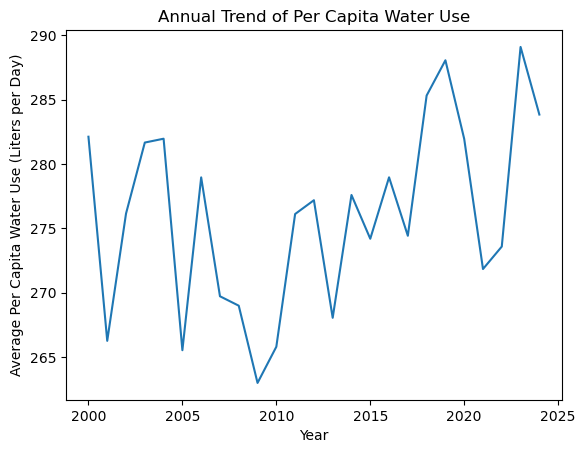

In [87]:
# The annual trend of per capita water consumption is analyzed
df.groupby('Year')['Per Capita Water Use (Liters per Day)'].mean().plot()
plt.title('Annual Trend of Per Capita Water Use')
plt.xlabel('Year')
plt.ylabel('Average Per Capita Water Use (Liters per Day)')
plt.show()

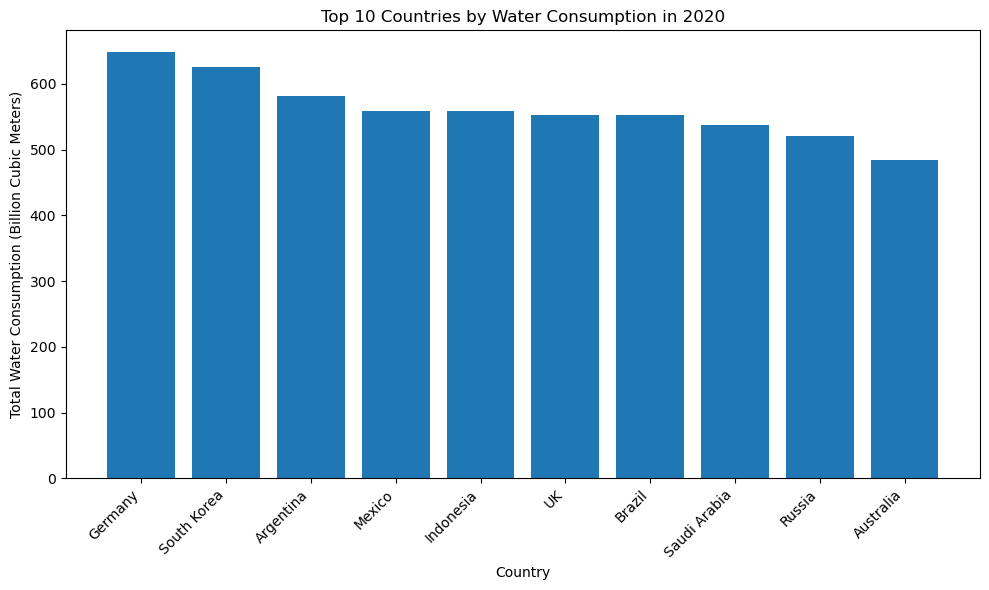

In [17]:
# The top 10 countries in total water consumption in 2020 are identified
top_10 = df[df['Year'] == 2020].nlargest(10, 'Total Water Consumption (Billion Cubic Meters)')[['Country', 'Total Water Consumption (Billion Cubic Meters)']]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10['Country'], top_10['Total Water Consumption (Billion Cubic Meters)'])
plt.title('Top 10 Countries by Water Consumption in 2020')
plt.xlabel('Country')
plt.ylabel('Total Water Consumption (Billion Cubic Meters)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# The countries experiencing the highest rate of groundwater depletion are identified
df[df['Year'] == 2024].nlargest(20, 'Groundwater Depletion Rate (%)')[['Country', 'Groundwater Depletion Rate (%)']]

,Country,Groundwater Depletion Rate (%)
174,Germany,3.237273
149,France,3.071667
99,Canada,3.000000
299,Mexico,2.885333
349,Saudi Arabia,2.875714
74,Brazil,2.872500
474,UK,2.823750
324,Russia,2.823333
449,Turkey,2.782857
374,South Africa,2.624545


In [31]:
# The average global water usage for the agricultural sector is calculated for each year
df.groupby('Year')['Agricultural Water Use (%)'].mean()

Year
2000    51.153159
2001    50.598283
2002    49.263433
2003    48.295642
2004    47.582132
2005    50.246105
2006    51.466802
2007    50.542301
2008    50.466418
2009    48.868844
2010    49.251067
2011    51.496861
2012    50.144617
2013    52.381124
2014    50.444123
2015    48.303727
2016    51.434003
2017    50.948661
2018    49.769174
2019    50.545960
2020    51.063096
2021    48.610594
2022    51.266322
2023    50.581114
2024    49.797172
Name: Agricultural Water Use (%), dtype: float64

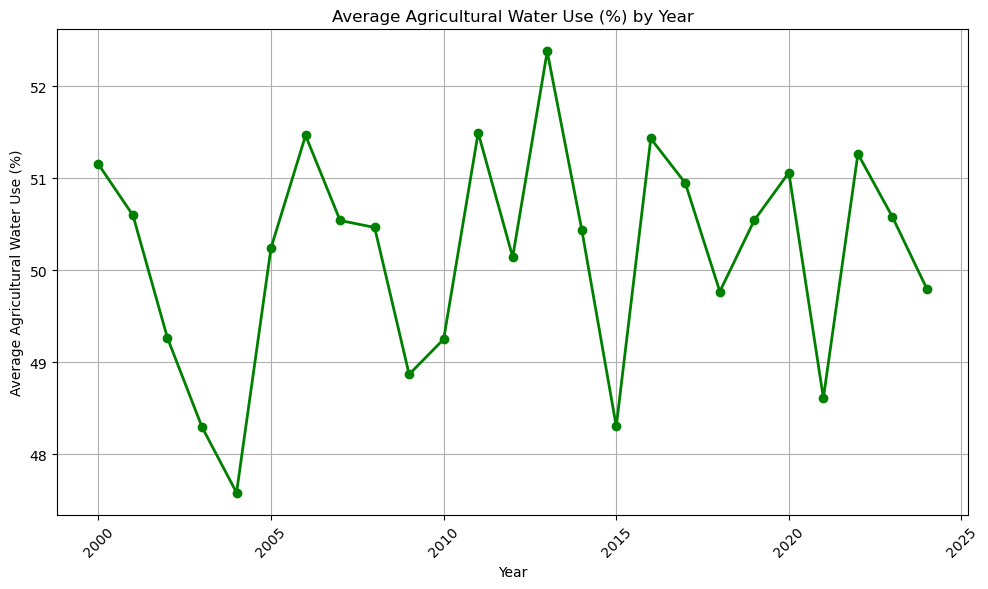

In [33]:
mean_agri_water = df.groupby('Year')['Agricultural Water Use (%)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_agri_water.index, mean_agri_water.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Average Agricultural Water Use (%) by Year')
plt.xlabel('Year')
plt.ylabel('Average Agricultural Water Use (%)')
plt.grid(True)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# The percentage of water used in the industrial sector is calculated for each country
df.groupby('Country')['Industrial Water Use (%)'].mean()

Country
Argentina       27.946761
Australia       28.724404
Brazil          26.612297
Canada          29.465351
China           27.854793
France          26.136218
Germany         28.645995
India           27.919001
Indonesia       26.853027
Italy           28.078849
Japan           28.821843
Mexico          27.989065
Russia          27.703461
Saudi Arabia    27.714798
South Africa    28.687093
South Korea     24.763615
Spain           27.785028
Turkey          29.102001
UK              27.690948
USA             27.362197
Name: Industrial Water Use (%), dtype: float64

In [73]:
# The correlation between rainfall and total water consumption is calculated
df[['Rainfall Impact (Annual Precipitation in mm)', 'Total Water Consumption (Billion Cubic Meters)']].corr()

,Rainfall Impact (Annual Precipitation in mm),Total Water Consumption (Billion Cubic Meters)
Rainfall Impact (Annual Precipitation in mm),1.000000,-0.024934
Total Water Consumption (Billion Cubic Meters),-0.024934,1.000000


In [51]:
# The top 20 years with the highest total water consumption are identified
df.groupby('Year')['Total Water Consumption (Billion Cubic Meters)'].sum().sort_values(ascending=False).head(20)

Year
2008    11062.775785
2004    10901.926143
2012    10681.364856
2011    10499.058375
2018    10443.218030
2017    10370.696665
2007    10351.435882
2003    10186.875738
2014    10153.322319
2000    10090.381994
2001    10061.071938
2022    10044.460189
2016     9997.277165
2024     9994.616590
2019     9899.099726
2006     9852.581137
2010     9825.115243
2015     9811.777311
2013     9658.748818
2023     9627.202787
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64

In [55]:
# The average annual rainfall is calculated for each country
df.groupby('Country')['Rainfall Impact (Annual Precipitation in mm)'].mean()

Country
Argentina       1560.517285
Australia       1475.031234
Brazil          1611.152682
Canada          1504.671510
China           1557.614454
France          1505.123498
Germany         1509.955455
India           1603.802107
Indonesia       1556.225193
Italy           1544.610440
Japan           1580.127173
Mexico          1492.961914
Russia          1553.171059
Saudi Arabia    1444.405107
South Africa    1488.581578
South Korea     1444.837558
Spain           1650.438604
Turkey          1559.825021
UK              1593.493404
USA             1659.940730
Name: Rainfall Impact (Annual Precipitation in mm), dtype: float64

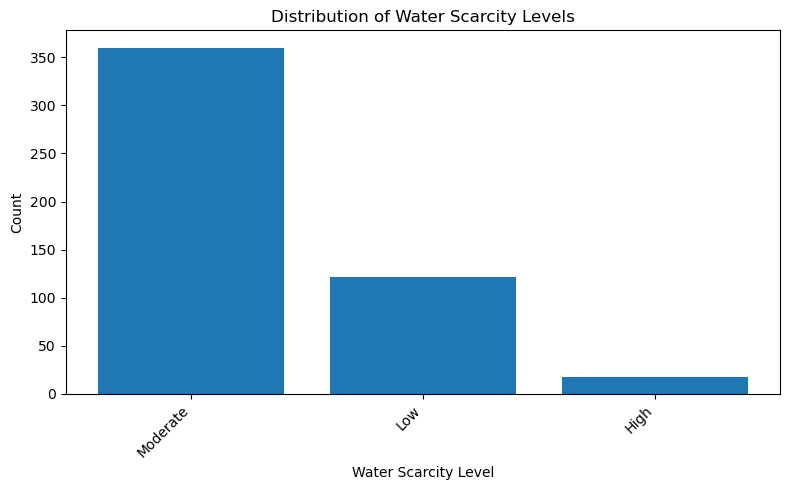

In [67]:
#Calculate the value counts for Water Scarcity Level
water_scarcity_counts = df['Water Scarcity Level'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(water_scarcity_counts.index, water_scarcity_counts.values)
plt.title('Distribution of Water Scarcity Levels')
plt.xlabel('Water Scarcity Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

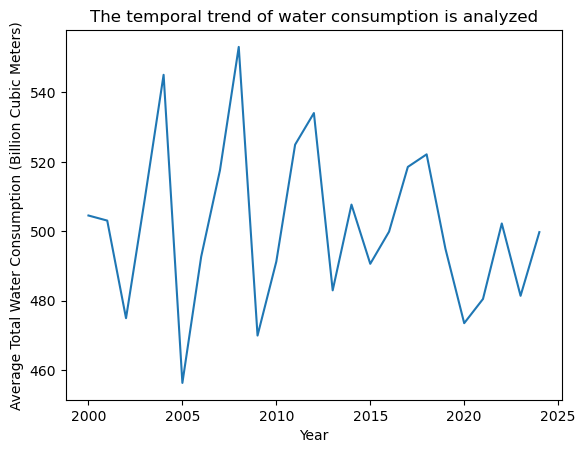

In [61]:
# The temporal trend of water consumption is analyzed

df.groupby('Year')['Total Water Consumption (Billion Cubic Meters)'].mean().plot(title='The temporal trend of water consumption is analyzed')
plt.xlabel('Year')
plt.ylabel('Average Total Water Consumption (Billion Cubic Meters)')
plt.show()

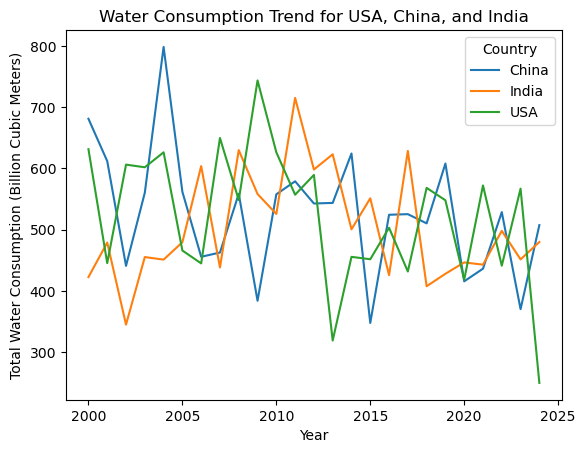

In [75]:
# 25. تغير استهلاك المياه مع الزمن لبعض الدول
import matplotlib.pyplot as plt
df[df['Country'].isin(['USA', 'China', 'India'])].pivot(index='Year', columns='Country', values='Total Water Consumption (Billion Cubic Meters)').plot()
plt.title('Water Consumption Trend for USA, China, and India')
plt.xlabel('Year')
plt.ylabel('Total Water Consumption (Billion Cubic Meters)')
plt.legend(title='Country')
plt.show()

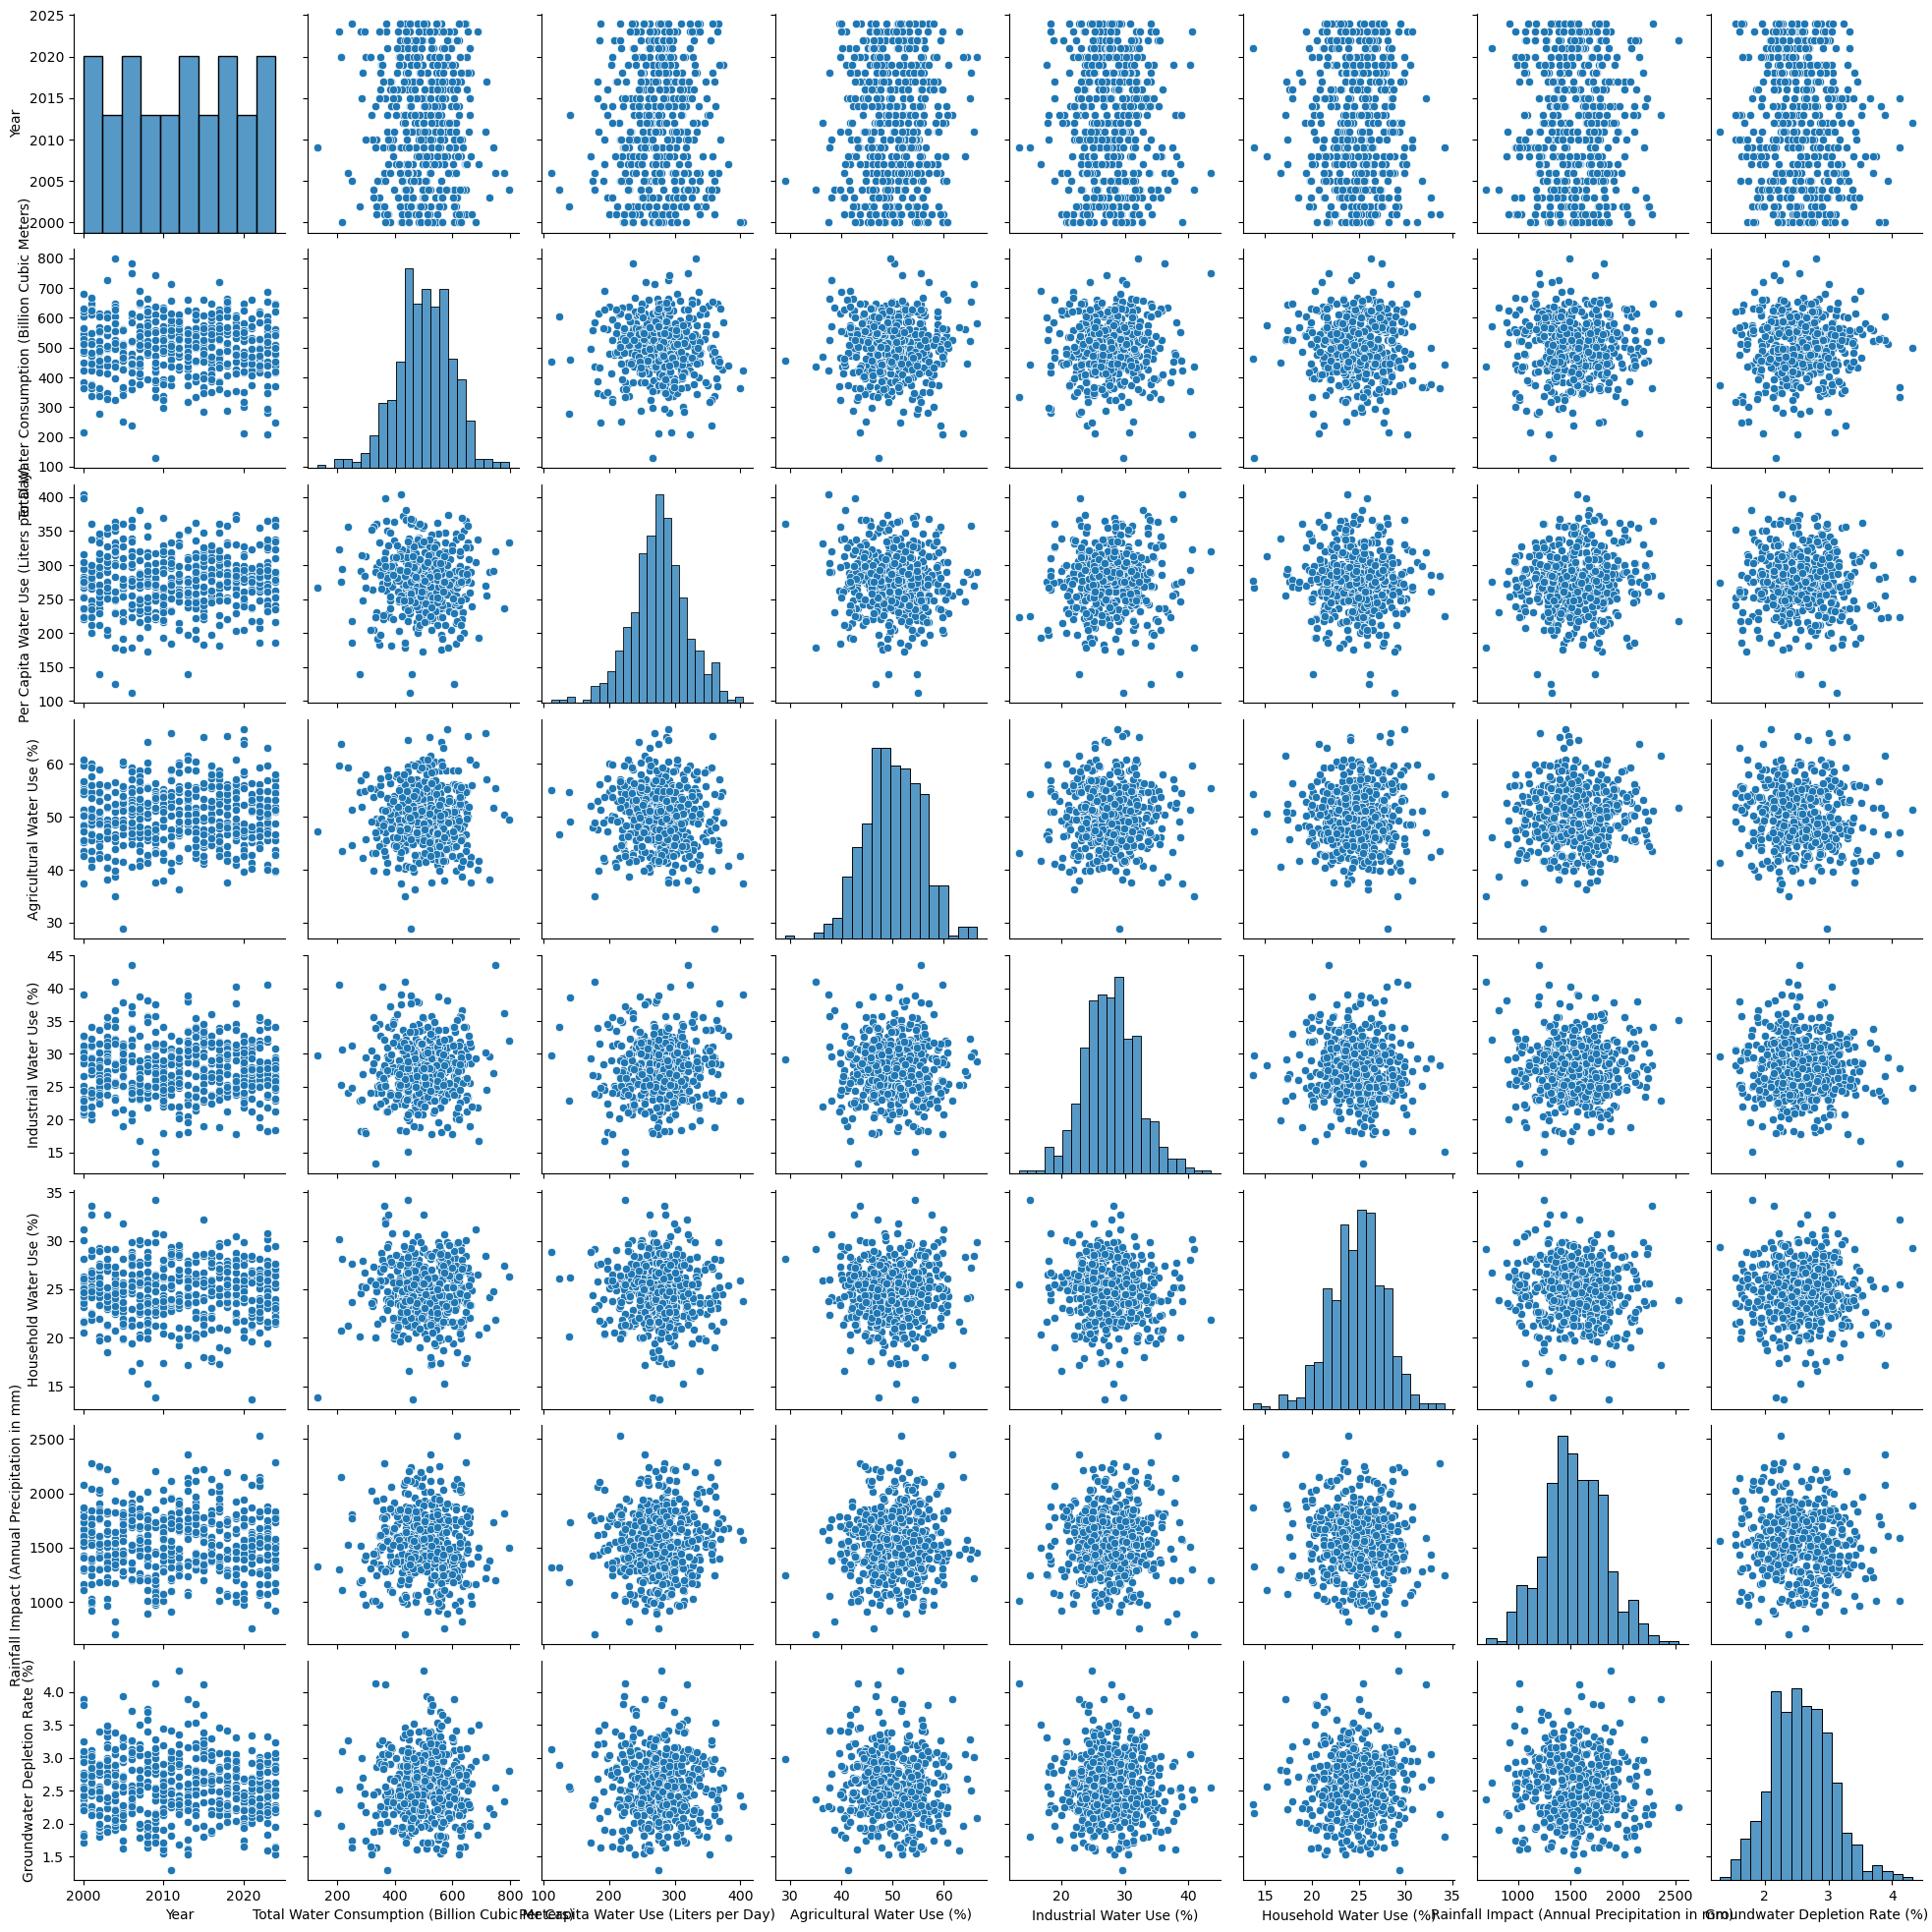

In [83]:
# A multivariate analysis is performed using a pairplot
sns.pairplot(df.select_dtypes(include='number'))

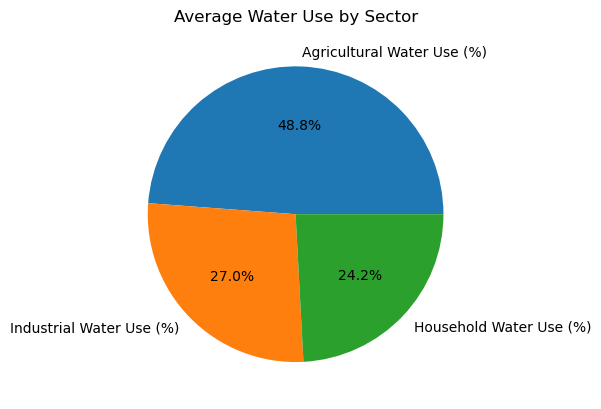

In [79]:
# Water usage by sector is visualized using a pie chart
df[['Agricultural Water Use (%)', 'Industrial Water Use (%)', 'Household Water Use (%)']].mean().plot.pie(autopct='%1.1f%%')
plt.title('Average Water Use by Sector')
plt.show()

<Axes: >

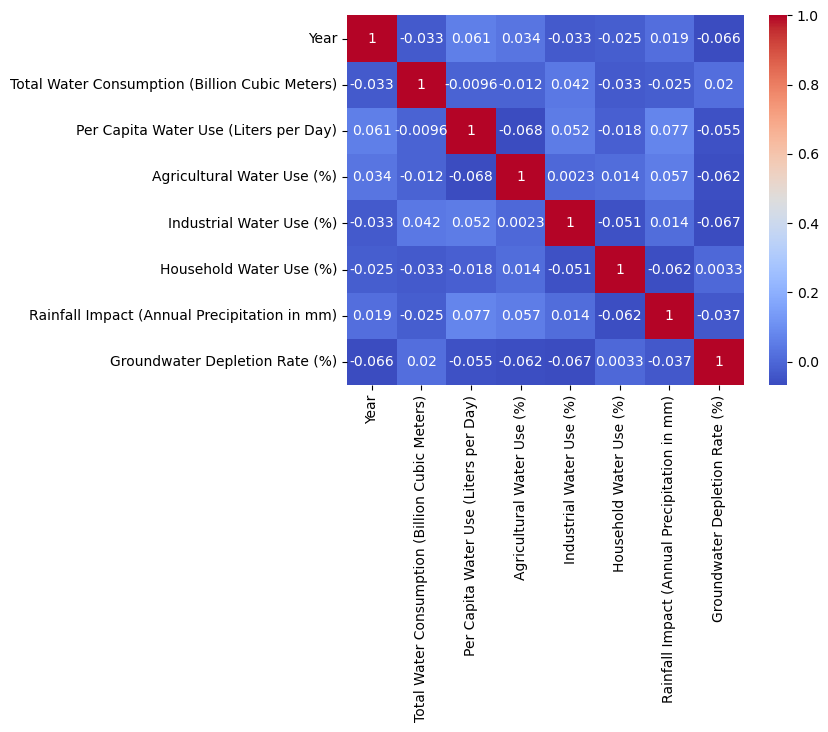

In [93]:
# The relationship between different sectors' water consumption is analyzed
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')